In [9]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

Running scvelo 0.2.4 (python 3.8.12) on 2022-05-18 10:42.


In [10]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']

samples = {
}


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Fukusima_F3967/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Fukusima_F3967/'
multi_sample = True
sc.settings.verbosity = 3
sc.settings.figdir = out_path+'/figures'

In [11]:
adata=sc.read_h5ad(out_path+'/mouse_F3967.h5ad')

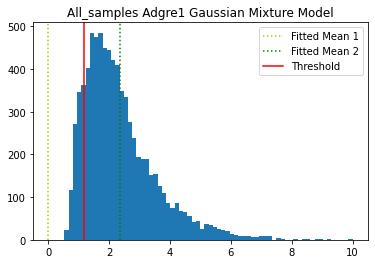

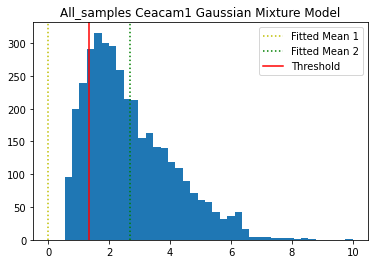

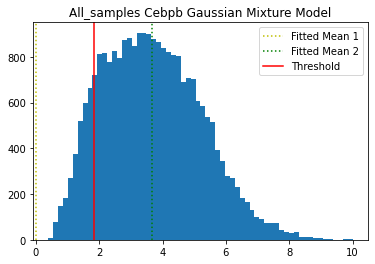

In [12]:
Factors = ['Adgre1', 'Ceacam1','Cebpb']
adata.obs['Defined_Types'] ='Binarized_'
for f in Factors:
    delta, var, cut_off,up_bound,low_bound= sc_pipe.Thrshold_by_Gaussian_with_plot(adata, f,out_path, 'All_samples', sparse = True)
    data = adata[:, f].X.A
    data =  np.interp(data, (data.min(), data.max()), (0, 10))
    adata.obs[f+'_binary'] = np.where(data > cut_off, f+'+', f+'-')
    adata.obs['Defined_Types'] =adata.obs['Defined_Types']+'_'+adata.obs[f+'_binary']

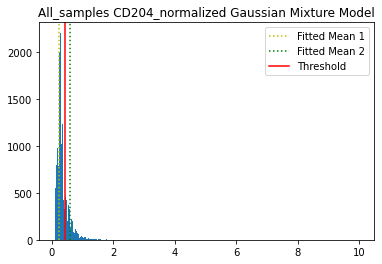

In [13]:
f = 'CD204_normalized'
delta, var, cut_off,up_bound,low_bound= sc_pipe.Thrshold_by_Gaussian_with_plot(adata, f,out_path, 'All_samples', sparse = False)
data = adata.obs['CD204_normalized']
data =  np.interp(data, (data.min(), data.max()), (0, 10))
adata.obs['CD204_binary'] = np.where(data > cut_off,'CD204+', 'CD204-')
adata.obs['Defined_Types'] =adata.obs['Defined_Types']+'_'+adata.obs['CD204_binary']

In [14]:
adata.obs['Selected_group'] = 'Others'
adata.obs.loc[adata.obs['leiden']=='13','Selected_group'] = 'Ly6c low monocyte'

In [15]:
adata.obs.loc[(adata.obs['Selected_group']=='Ly6c low monocyte')&(adata.obs['Defined_Types']=='Binarized__Adgre1-_Ceacam1+_Cebpb+_CD204+'),'Selected_group']='SatM'

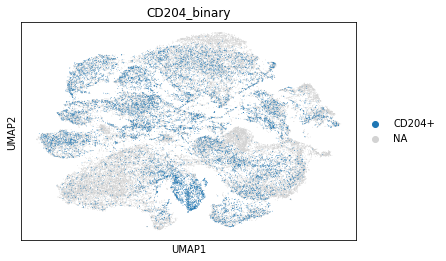

In [16]:
sc.pl.umap(adata,color ='CD204_binary',groups='CD204+')


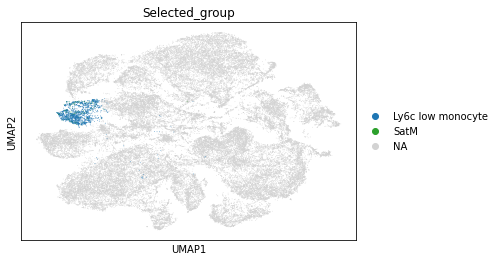

In [17]:
sc.pl.umap(adata,color='Selected_group',groups=['Ly6c low monocyte','SatM'])

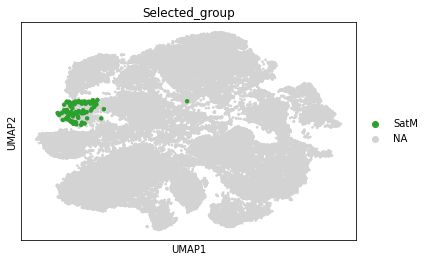

In [18]:
sc.pl.umap(adata,color='Selected_group',groups=['SatM'], size=[
        80 if c == 'SatM' else 30 for c in adata.obs['Selected_group']
    ],)

In [19]:
adata.obs['Selected_group'].value_counts()

Others               57336
Ly6c low monocyte     1576
SatM                    96
Name: Selected_group, dtype: int64

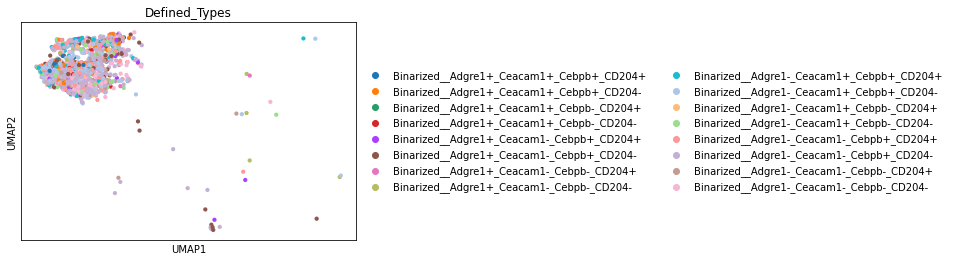

In [20]:
sc.pl.umap(adata[adata.obs['leiden']=='13'],color='Defined_Types')

In [21]:
sub = adata[adata.obs['leiden']=='13'].copy()

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


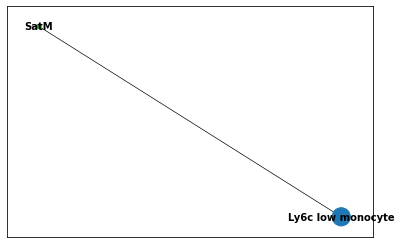

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


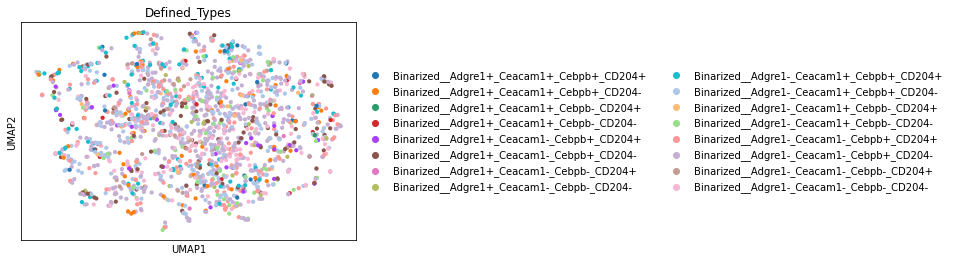

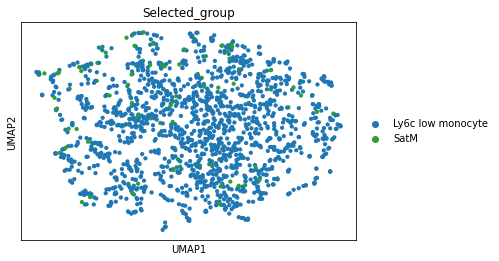

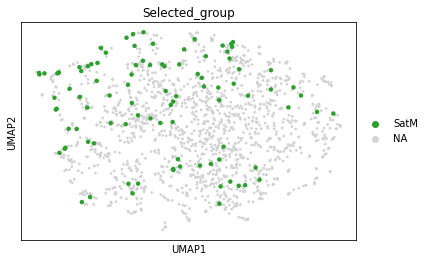

In [22]:
sc.tl.paga(sub, groups='Selected_group')
sc.pl.paga(sub,node_size_power= 1.0,threshold=0.1 ,edge_width_scale = 0.1) 
sc.tl.umap(sub,  init_pos=sc.tl._utils.get_init_pos_from_paga(sub), maxiter=100,min_dist=0.1, spread=4.0)
sc.pl.umap(sub,color='Defined_Types')
sc.pl.umap(sub,color='Selected_group')
sc.pl.umap(sub,color='Selected_group',groups=['SatM'], size=[
        80 if c == 'SatM' else 30 for c in sub.obs['Selected_group']
    ],)

In [23]:
adata[adata.obs['leiden']=='13'].obs['Defined_Types'].value_counts()

Binarized__Adgre1-_Ceacam1-_Cebpb+_CD204-    530
Binarized__Adgre1-_Ceacam1+_Cebpb+_CD204-    268
Binarized__Adgre1-_Ceacam1-_Cebpb-_CD204-    205
Binarized__Adgre1-_Ceacam1-_Cebpb+_CD204+    156
Binarized__Adgre1+_Ceacam1-_Cebpb+_CD204-     99
Binarized__Adgre1-_Ceacam1+_Cebpb+_CD204+     96
Binarized__Adgre1-_Ceacam1+_Cebpb-_CD204-     77
Binarized__Adgre1+_Ceacam1+_Cebpb+_CD204-     66
Binarized__Adgre1-_Ceacam1-_Cebpb-_CD204+     52
Binarized__Adgre1+_Ceacam1-_Cebpb+_CD204+     38
Binarized__Adgre1+_Ceacam1-_Cebpb-_CD204-     28
Binarized__Adgre1+_Ceacam1+_Cebpb+_CD204+     20
Binarized__Adgre1-_Ceacam1+_Cebpb-_CD204+     17
Binarized__Adgre1+_Ceacam1+_Cebpb-_CD204-     12
Binarized__Adgre1+_Ceacam1-_Cebpb-_CD204+      5
Binarized__Adgre1+_Ceacam1+_Cebpb-_CD204+      3
Name: Defined_Types, dtype: int64

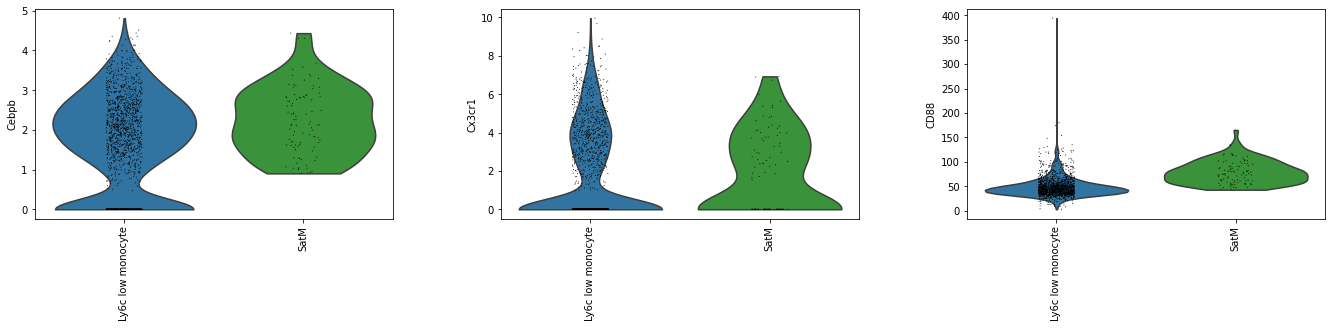

In [24]:

sc.pl.violin(adata[adata.obs['leiden']=='13'],keys=['Cebpb', 'Cx3cr1','CD88'],groupby = 'Selected_group',swap_axes=True,rotation=90,use_raw=False)

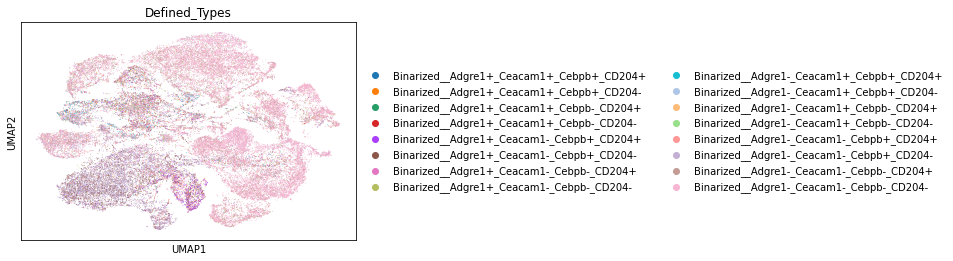

In [25]:
sc.pl.umap(adata,color='Defined_Types')

In [26]:
adata.write_h5ad(out_path+'/mouse_F3967.h5ad')

In [27]:
adata.obs['Leiden'] = adata.obs['leiden']

In [28]:
from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/mouse_F3967.h5ad', out_path+'/F3967_0518.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Conditions to numeric, treating as categorical
Cannot convert Organ to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert Selected_group to numeric, treating as categorical
Cannot convert Defined_Types to numeric, treating as categorical
Cannot convert Adgre1_binary to numeric, treating as categorical
Cannot convert Msr1_binary to numeric, treating as categorical
Cannot convert Ceacam1_binary to numeric, treating as categorical
Cannot convert Cebpb_binary to numeric, treating as categorical
Cannot convert CD204_binary to numeric, treating as categorical
"predicted_doublet" is not numeric or categorical, ignoring
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/285db06964dc45d494f63ebc99423e0f.json
Writing main/metadata/05796f0f18a4

'/user/ifrec/liuyuchen/Analysis_Reports/Fukusima_F3967//F3967_0518.bcs'

In [30]:
adata[adata.obs['Selected_group']=='SatM'].obs['Sample'].value_counts()

BLM_Blood-2_5DE    96
Name: Sample, dtype: int64